TEST YOLOV8 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive/data_endek"

new_saved_modelmodel_1.h5  new_saved_modelmodel_4.h5  test
new_saved_modelmodel_2.h5  new_saved_modelmodel_5.h5  train
new_saved_modelmodel_3.h5  saved_model


In [12]:
DATA_DIR = '/content/drive/MyDrive/data_endek/'

In [5]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.6/609.6 kB 6.1 MB/s eta 0:00:00


In [24]:
import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n-cls.pt") 

# Use the model
results = model.train(data=DATA_DIR, epochs=20, imgsz=64) 


Ultralytics YOLOv8.0.158 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/data_endek/, epochs=20, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, 

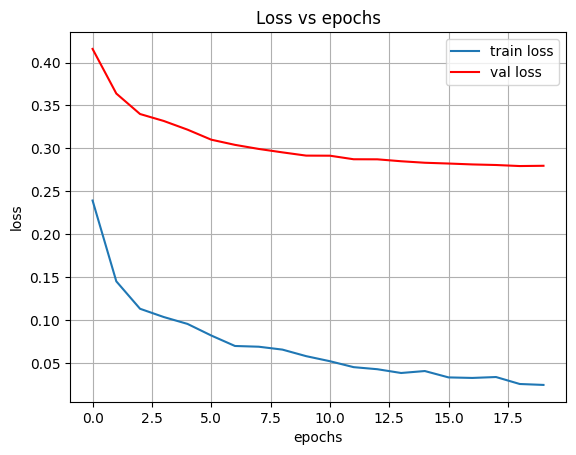

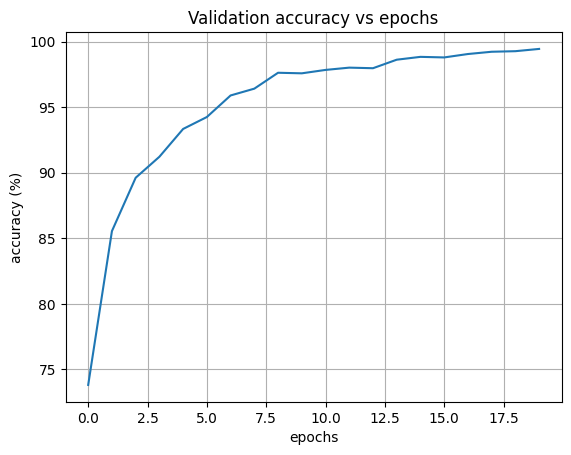

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt


results_path = './runs/classify/train4/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()


In [27]:
from ultralytics import YOLO

import numpy as np


model = YOLO('./runs/classify/train4/weights/last.pt')  # load a custom model

results = model('/content/drive/MyDrive/data_endek/test/fauna/fauna (708).jpg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])


image 1/1 /content/drive/MyDrive/data_endek/test/fauna/fauna (708).jpg: 64x64 fauna 0.90, flora 0.10, gringsing 0.00, 17.1ms
Speed: 0.8ms preprocess, 17.1ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


{0: 'fauna', 1: 'flora', 2: 'gringsing'}
[0.8974660634994507, 0.10252443701028824, 9.533774573355913e-06]
fauna
